## Coupled Neuron Models

#### Nonlinear Oscillators (Coupled Neuron Models)
* Fitzhugh-Nagumo
* Morris-Lecar  
* Hindmarsh-Rose
* Hodgkins-Huxley    

In [1]:
# Shebang

import Helper as hp

#### Linearly Coupled Fitzhugh-Nagumo

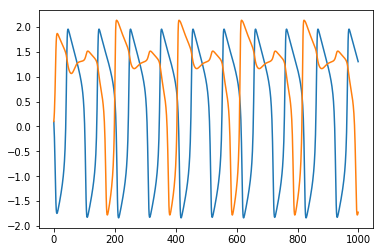

In [2]:
a = 0.75
b = 0.8
c = 3
i = -0.6
k1 = 0.03
k2 = 0.3
inits = [0.1, 0.1, 0.1, 0.1]

# Coupling method: Numerical bifurcation analysis of two coupled Fitzhugh-Nagumo oscillators
#                 Anderson Hoff, Juliana V. dos Santos, Cesar Manchein, Holokz A. Albaquerque

def lcoupled_fitzhughnagumo_equation(state, t):
    v, w, v1, w1 = hp.tf.unstack(state)
    dv = c*(v + w - (v**3/3) + i) + k1*(v - v1)
    dw = -1/c * (v - a + b*w)
    dv1 = c*(v1 + w1 - (v1**3/3)) + k2*(v1 - v)
    dw1 = -1/c * (v1 - a + b*w1)
    return hp.tf.stack([dv, dw, dv1, dw1])

sess = hp.tf.Session()
state, info = sess.run(hp.generate_odesolution(lcoupled_fitzhughnagumo_equation, inits, tfinal=100))
v, w, v1, w1 = state.T

hp.plt.plot(v)
hp.plt.plot(v1)

#### Linearly Coupled Morris-Lecar

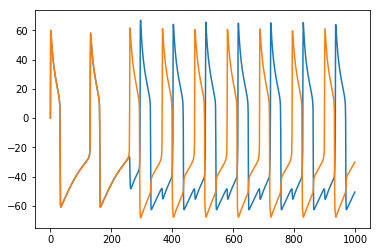

In [3]:
vk = -84
gk = 8
vca = 130
gca = 4.4
vl = -60
gl = 2
phi = 0.04
v1 = -1.2
v2 = 18
v3 = 2
v4 = 30
iapp = 80
k1 = 0.3
k2 = 0.3
inits = [0.1, 0.1, 0.11, 0.1]

def lcoupled_morrislecar_equation(state, t):
    v, n, v0, n0 = hp.tf.unstack(state)
    dv = (-gca*(0.5*(1 + hp.tf.tanh((v - v1)/v2)))*(v - vca) - gk*n*(v - vk) - gl*(v - vl) + iapp + k1*(v - v0))
    dn = (phi*((0.5*(1 + hp.tf.tanh((v - v3)/v4))) - n))/(1/hp.tf.cosh((v - v3)/(2*v4)))
    dv0 = (-gca*(0.5*(1 + hp.tf.tanh((v0 - v1)/v2)))*(v0 - vca) - gk*n0*(v0 - vk) - gl*(v0 - vl) + iapp + k2*(v0 - v))
    dn0 = (phi*((0.5*(1 + hp.tf.tanh((v0 - v3)/v4))) - n0))/(1/hp.tf.cosh((v0 - v3)/(2*v4)))
    return hp.tf.stack([dv, dn, dv0, dn0])

sess = hp.tf.Session()
state, info = sess.run(hp.generate_odesolution(lcoupled_morrislecar_equation, inits, tfinal=500))
v, n, v0, n0 = state.T
hp.plt.plot(v)
hp.plt.plot(v0)

#### Linearly Coupled Hindmarsh-Rose  

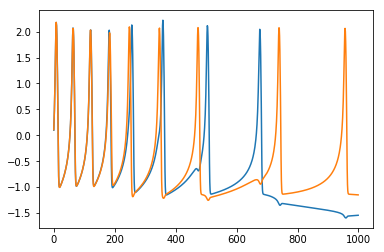

In [4]:
a = 1.0
b = 3.0
c = 1.0
d = 5.0
r = 0.006
s = 4.0
i = 1.6
xnot = -1.5
k1 = 0.3
k2 = 0.3
inits = [0.1, 0.1, 0.1, 0.11, 0.1, 0.1]

def lcoupled_hindmarshrose_equation(state, t):
    x, y, z, x1, y1, z1 = hp.tf.unstack(state)
    dx = (y - a*(x**3) + (b*(x**2)) - z + i) + k1*(x - x1)
    dy = c - d*(x**2) - y
    dz = r*(s*(x - xnot) - z)
    dx1 = (y1 - a*(x1**3) + (b*(x1**2)) - z1 + i) + k2*(x1 - x)
    dy1 = c - d*(x1**2) - y1
    dz1 = r*(s*(x1 - xnot) - z1)
    return hp.tf.stack([dx, dy, dz, dx1, dy1, dz1])

sess = hp.tf.Session()
state, info = sess.run(hp.generate_odesolution(lcoupled_hindmarshrose_equation, inits, tfinal=100))
x, y, z, x1, y1, z1 = state.T
hp.plt.plot(x)
hp.plt.plot(x1)

#### Linearly Coupled Hodgkin-Huxley

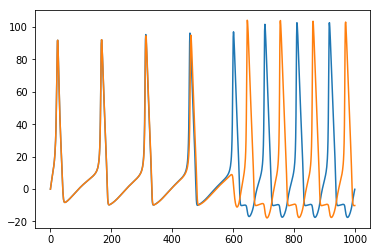

In [5]:
g_K = 36
g_Na = 120
g_L = 0.3
E_K = 12
E_Na = -115
E_L = -10.613
C_m = 1
I = -10
k1 = 0.3
k2 = 0.3
inits = [0.1, 0.1, 0.1, 0.1, 0.11, 0.1, 0.1, 0.1]

def lcoupled_hodgkinhuxley_equation(state, t):
    i, n, m, h, i1, n1, m1, h1 = hp.tf.unstack(state)
    # Alpha and beta functions for channel activation functions
    alpha_n = (0.01*(i + 10))/(hp.tf.exp((i + 10)/10) - 1)
    beta_n = 0.125* hp.tf.exp(i/80)
    alpha_m = (0.1*(i + 25))/(hp.tf.exp((i + 25)/10) - 1)
    beta_m = 4*hp.tf.exp(i/18)
    alpha_h = (0.07*hp.tf.exp(i/20))
    beta_h = 1/(hp.tf.exp((i + 30)/10) + 1)
    alpha_n1 = (0.01*(i1 + 10))/(hp.tf.exp((i1 + 10)/10) - 1)
    beta_n1 = 0.125* hp.tf.exp(i1/80)
    alpha_m1 = (0.1*(i1 + 25))/(hp.tf.exp((i1 + 25)/10) - 1)
    beta_m1 = 4*hp.tf.exp(i1/18)
    alpha_h1 = (0.07*hp.tf.exp(i1/20))
    beta_h1 = 1/(hp.tf.exp((i1 + 30)/10) + 1)
    # Differential Equations
    di = (g_K*(n**4)*(i - E_K) + g_Na*(m**3)*h*(i - E_Na) + g_L*(i - E_L) - I)*(-1/C_m) + k1*(i - i1)
    dn = alpha_n*(1 - n) - beta_n*n
    dm = alpha_m*(1 - m) - beta_m*m
    dh = alpha_h*(1 - h) - beta_h*h
    di1 = (g_K*(n1**4)*(i1 - E_K) + g_Na*(m1**3)*h1*(i1 - E_Na) + g_L*(i1 - E_L) - I)*(-1/C_m) + k2*(i1 - i)
    dn1 = alpha_n1*(1 - n1) - beta_n1*n1
    dm1 = alpha_m1*(1 - m1) - beta_m1*m1
    dh1 = alpha_h1*(1 - h1) - beta_h1*h1
    return hp.tf.stack([di, dn, dm, dh, di1, dn1, dm1, dh1])

sess = hp.tf.Session()
state, info = sess.run(hp.generate_odesolution(lcoupled_hodgkinhuxley_equation, inits, tfinal=100))
i, n, m, h, i1, n1, m1, h1 = state.T
hp.plt.plot(-i)
hp.plt.plot(-i1)